# **CAPSTONE 3 : BANK MARKETING CAMPAIGN**

`Created by : Syafiq Basmallah`

---

## **Outline**

1. Business Problem

2. Data Understanding

3. Data Preparation

4. Modeling - Evaluation

5. Conclusion & Recomendation

## **1. Bussines Problem Understanding**

### **Context**
Bank Sigma secara berkala mengadakan kampanye pemasaran untuk mempromosikan produk deposito berjangka kepada nasabahnya. Kampanye ini dilakukan melalui pendekatan langsung kepada pelanggan yang diidentifikasi memiliki potensi partisipasi. Dengan memanfaatkan data historis dari kampanye sebelumnya, Bank Sigma bertujuan menganalisis profil nasabah yang cenderung tertarik pada program deposito berjangka. Hal ini bertujuan untuk meningkatkan efisiensi dalam menargetkan nasabah yang relevan, meminimalkan pemborosan anggaran pemasaran, serta mengoptimalkan efektivitas strategi kampanye.


### **Problem Statement**
Bagaimana perusahaan perbankan dapat memanfaatkan machine learning untuk mengidentifikasi nasabah berpotensi tertarik pada kampanye deposito berjangka, guna mengoptimalkan alokasi anggaran pemasaran, meningkatkan efisiensi, dan memaksimalkan profitabilitas?

### **Goals**

Dengan menggunakan Machine Learning, kita dapat mengidentifikasi pelanggan yang memiliki potensi untuk merespons kampanye pemasaran serta pelanggan yang tidak akan merespons. Hasil prediksi ini memungkinkan perusahaan untuk mengoptimalkan alokasi anggaran pemasaran dan mengurangi waktu yang dihabiskan oleh tim telemarketing untuk menghubungi pelanggan yang tidak relevan. Selain itu, model ini memastikan bahwa pelanggan yang berpotensi tinggi tidak terlewatkan, sehingga meningkatkan efektivitas kampanye dan pada akhirnya mendorong pertumbuhan profitabilitas perusahaan.

### **Analytical Aproach**

### **Evaluation Metrics**

target:<br>
1 : customer yang berpotensi mengambil program deposito berjangka<br>
0 : customer yang tidak berpotensi mengambil program deposito berjangka

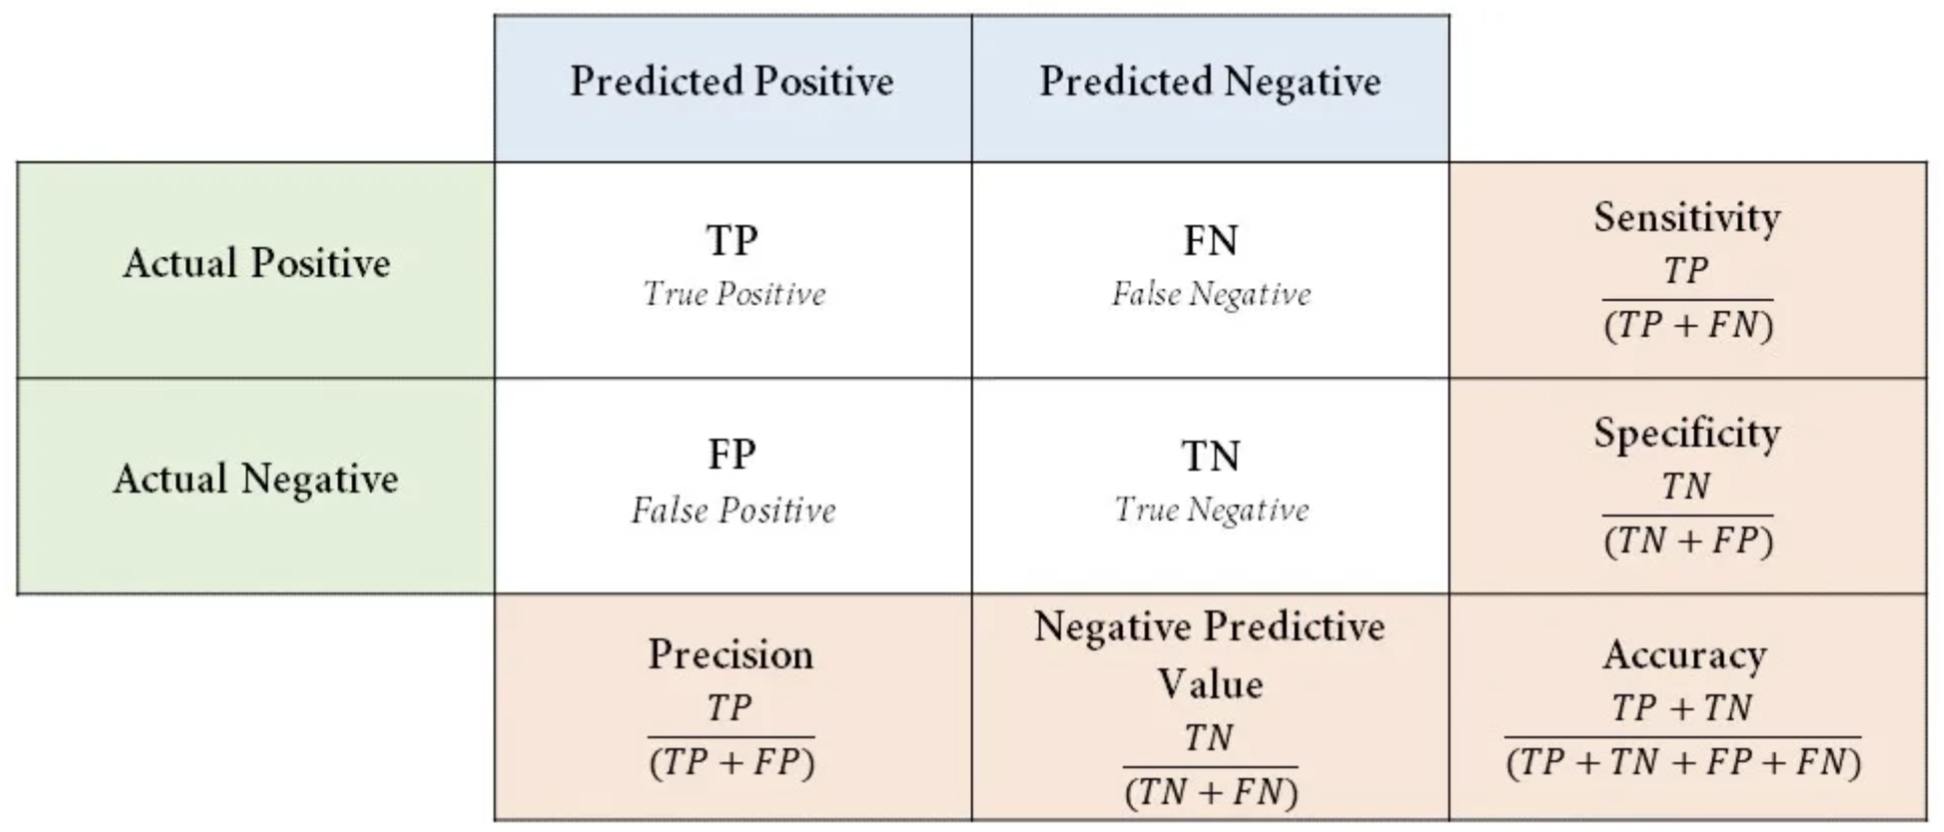

TP = dapat memprediksi customer yang berpotensi mengambil kampanye pemasaran <br>
TN = dapat memprediksi customer yang tidak akan mengambil kampanye pemasaran <br>
FP = salah memprediksi customer yang berpotensi, sebenarnya tidak akan mengambil kampanye pemasaran => kons= kita jadi perlu mengeluarkan biaya dan waktu yang lebih kepada customer yang sebenarnya tidak akan mengambil kampanye pemasaran <br>
FN = salah memprediksi customer yang tidak akan mengambil, sebenarnya berpotensi akan mengambil kampanye pemasaran => kita jadi kehilangan calon customer yang berpotensi akan mengambil kampanye pemasaran(kehilangan calon profit)

Seperti yang dijelaskan dalam problem statement, tim pemasaran ingin mengurangi biaya kampanye dan meningkatkan profitabilitas. Untuk itu, mereka perlu fokus pada mengurangi False Positives (FP) dan False Negatives (FN).

FP (False Positives): Nasabah yang tidak tertarik tetapi tetap dihubungi, menghabiskan anggaran yang tidak perlu.
FN (False Negatives): Nasabah yang tertarik tetapi tidak dihubungi, yang berarti peluang hilang.
F1-Score digunakan untuk mencari keseimbangan antara precision (memastikan nasabah yang dihubungi tertarik) dan recall (memastikan nasabah yang tertarik tidak terlewatkan). Ini sangat penting jika data tidak seimbang (imbalanced), karena F1-Score memberi gambaran yang lebih adil daripada accuracy, yang bisa menyesatkan.

Dengan memilih model yang memiliki nilai F1 tertinggi, perusahaan bisa mengoptimalkan anggaran pemasaran dan memaksimalkan profit tanpa membuang-buang sumber daya.









## **2. Data Understanding** 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

#splitting
from sklearn.model_selection import train_test_split

#imputer
from sklearn.impute import SimpleImputer

#scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, KBinsDiscretizer, PolynomialFeatures

#encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce



#feature_selection
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif,SelectFromModel, RFE, SequentialFeatureSelector

#resampling
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NeighbourhoodCleaningRule, NearMiss


#preprocessing
from sklearn.compose import ColumnTransformer

#model
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier,Perceptron,PassiveAggressiveClassifier,RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis

from lightgbm import LGBMClassifier
from sklearn import svm
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,accuracy_score,classification_report
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import time

#tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score

#pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

#metric
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score ,classification_report, mean_squared_error, mean_absolute_error, recall_score, f1_score, confusion_matrix, fbeta_score

In [16]:
df=pd.read_csv('data_bank_marketing_campaign.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [18]:
df.shape

(7813, 11)

In [19]:
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


Seperti yang bisa dilihat dari dataset diatas "data_bank_marketing_campaign.csv" memiliki beberapa kolom yaitu :
##### Customer Data
1. age       : Menampilkan umur customer.
2. job       : Menampilkan pekerjaan customer.
3. balance   : Menampilkan saldo customer.
4. housing   : Menampilkan customer memiliki pinjaman rumah atau tidak.
5. loan      : Menampilan customer memiliki pinjaman pribadi atau tidak.

##### Campaign Data
1. contact   : Jenis komunikasi kontak.
2. month     : Bulan terakhir customer di kontak dalam tahun.
3. campaign  : Jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini.
4. pdays     : Jumlah hari setelah klien dihubungi dari kampanye sebelumnya.
5. poutcome : Hasil dari kampanye pemasaran sebelumnya.
6. deposit  : Apakah pelanggan menyetor dana atau tidak.

In [21]:
#melihat data unique di setiap kolom
pd.set_option('display.max_colwidth', None)
features=[]
unique=[]
nunique=[]
miss_sum=[]

for i in df.columns:
    features.append(i)
    unique.append(df.sort_values(i)[i].unique())
    nunique.append(df[i].nunique())
    miss_sum.append(df[i].isna().sum())

pd.DataFrame({'features':features,
            'unique':unique,
             'nunique':nunique,
             'miss_sum':miss_sum})

,features,unique,nunique,miss_sum
0,age,"[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 92, 93, 95]",75,0
1,job,"[admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown]",12,0
2,balance,"[-6847, -3058, -2282, -1965, -1944, -1701, -1636, -1531, -1489, -1451, -1415, -1386, -1206, -1139, -1053, -1050, -1042, -994, -974, -972, -971, -970, -938, -934, -930, -888, -887, -861, -849, -839, -825, -824, -813, -811, -805, -799, -782, -770, -762, -754, -752, -745, -722, -713, -701, -700, -675, -671, -666, -663, -639, -637, -636, -634, -633, -616, -614, -613, -601, -600, -588, -581, -575, -565, -558, -556, -553, -547, -546, -538, -529, -522, -516, -509, -508, -505, -504, -498, -497, -496, -493, -492, -491, -487, -479, -475, -473, -470, -468, -467, -466, -463, -462, -461, -456, -454, -451, -449, -448, -444, ...]",3153,0
3,housing,"[no, yes]",2,0
4,loan,"[no, yes]",2,0
5,contact,"[cellular, telephone, unknown]",3,0
6,month,"[apr, aug, dec, feb, jan, jul, jun, mar, may, nov, oct, sep]",12,0
7,campaign,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 33, 43, 63]",32,0
8,pdays,"[-1, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 17, 20, 21, 24, 28, 29, 31, 33, 34, 35, 36, 37, 38, 40, 41, 43, 44, 48, 50, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, ...]",422,0
9,poutcome,"[failure, other, success, unknown]",4,0


Insight:
1. Fitur balance dapat bernilai negatif dikarenakan adanya biaya admin yang dapat mengurangi saldo rekening nasabah hingga negatif jika saldo nasabah saat itu adalah kosong (0).
2. Fitur pdays dapat bernilai -1 mengartikan calon pelanggan tersebut belum pernah dihubungi pada campaign sebelumnya.
3. Fitur poutcome memiliki 4 nilai yaitu:
- Success: kampanye yang dilakukan sebelumnya berhasil membuat calon pelanggan menggunakan produk meskipun sudah dihubungi
- Failure: kampanye yang dilakukan sebelumnya tidak membuat calon pelanggan menggunakan produk meskipun sudah dihubungi
- Other: calon pelanggan tidak mengangkat ketika dihubungi
- Unknown: calon pelanggan tidak pernah dihubungi sebelumnya

Kita akan gunakan kolom deposit sebagai label yang akan diprediksi, sedangkan kolom lainnya akan dijadikan sebagai fitur untuk memprediksi label.

sebenarnya dataframe yang kita punya pada dasarnya bisa dianggap data imbalance. tetapi bila kita tidak lakukan proses resampling juga tidak apa-apa karena memang data yang kita punya hanya imbalance sedikit sekali, mungkin orang lain juga bisa menganggap nya balance. penggunaan matrics evaluasi f1 sendiri sudah cocok jika ingin melihat evaluasi metrics pada data yang imbalance. nah, maka dari itu, nanti kita akan coba lakukan resampling, apakah resampling dapat mempengaruhi nilai evaluasi metrics atau tidak di kasus ini.

In [24]:
df['deposit'].value_counts()/len(df)*100

deposit
no     52.233457
yes    47.766543
Name: count, dtype: float64

Dapat dilihat bahwa ada imbalance meskipun sangat kecil, tetapi saya akan tetap menggunakan resample

## **3. Data Preparation**

### Check Nilai yang Hilang

In [27]:
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

Tidak ditemukan missing value pada dataset

### Check Data Duplikat

In [30]:
df.duplicated().sum()

8

In [31]:
df.duplicated().sum()/len(df)*100

0.10239344681940356

In [32]:
df[df.duplicated()]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


In [33]:
df.drop_duplicates(inplace=True)

Ditemukan 8 data duplikat pada dataset. Maka dari itu saya akan menghapus baris data yang mengandung data duplikat.

### Uji Normalitas

In [132]:
from scipy.stats import normaltest

# Apply normaltest to each column and collect the p-values
normality_results = df.select_dtypes(include='number').apply(lambda col: normaltest(col.dropna())[1]).reset_index()

# Rename columns
normality_results.columns = ['Column', 'p-value']

# Print the result
normality_results

,Column,p-value
0,age,3.311102e-179
1,balance,0.000000e+00
2,campaign,0.000000e+00
3,pdays,0.000000e+00
4,deposit,0.000000e+00


In [134]:
normality_results[normality_results['p-value']<=0.05]['Column'].unique()

array(['age', 'balance', 'campaign', 'pdays', 'deposit'], dtype=object)

Dari pengamatan, terlihat bahwa semua data numerik tidak terdistribusi dengan normal. Oleh karena itu, dalam model pipeline, semua fitur akan diterapkan scaling robust agar model lebih konsisten terhadap data yang memiliki nilai outlier.

### Outlier Handling

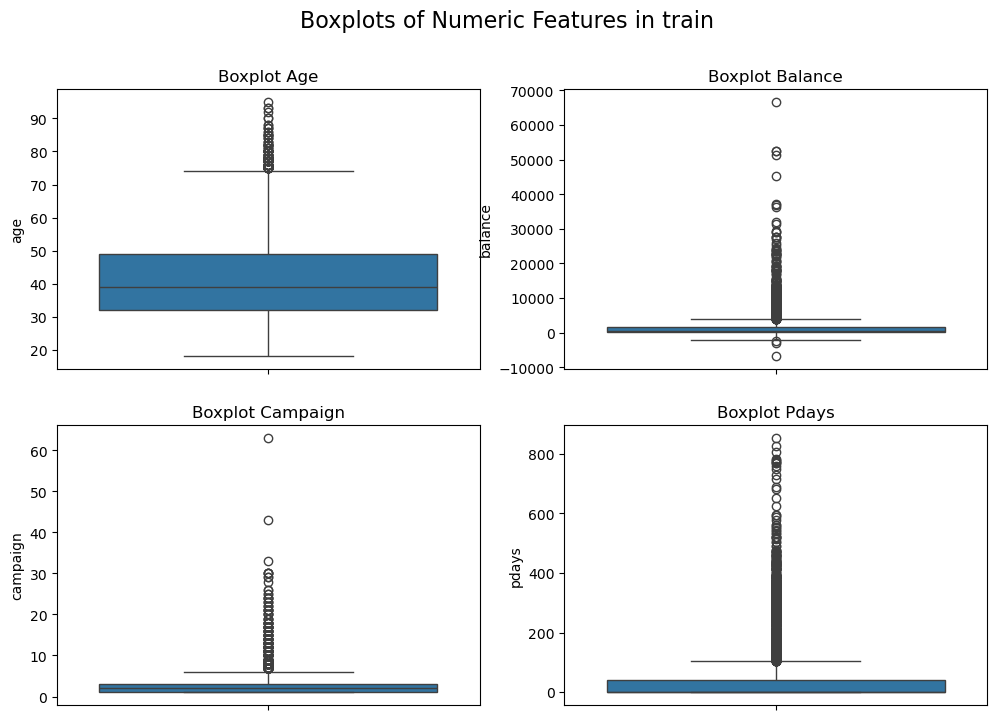

In [36]:
#Boxplot data numeric pada train data
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(df["age"])
plt.title("Boxplot Age")

plt.subplot(2,2,2)
sns.boxplot(df["balance"])
plt.title("Boxplot Balance")

plt.subplot(2,2,3)
sns.boxplot(df["campaign"])
plt.title("Boxplot Campaign")

plt.subplot(2,2,4)
sns.boxplot(df["pdays"])
plt.title("Boxplot Pdays")

plt.suptitle("Boxplots of Numeric Features in train", fontsize=16)

plt.show()

Terlihat pada boxplot, dalam dataset terdapat extreme outlier pada kolom campaign dan balance. 
Untuk memperoleh pemodelan yang lebih optimal, saya akan menghapus data outlier ekstrem dengan mengacu pada perbandingan boxplot.


In [38]:
df = df[df["campaign"]<40]
df = df[df["balance"]<40000]
    
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


Saya akan menggunakan kolom deposit sebagai label yang akan diprediksi, dikarenakan tipe data label masih berupa object saya akan menggantinya menjadi numeric.

In [40]:
df["deposit"] = np.where(df["deposit"]=="no",0,1)

Pada fitur job dan contact, terdapat nilai unknown. Oleh karena itu, kita akan mengganti nilai unknown tersebut dengan np.NaN, sehingga dapat diimputasi di dalam pipeline.

In [42]:
df["job"] = np.where(df["job"]=="unknown",np.nan,df["job"])
df["contact"] = np.where(df["contact"]=="unknown",np.nan,df["contact"])


display(df)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,1
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7810,36,NaN,179,no,no,cellular,aug,8,-1,unknown,0
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,0


# **4. Modelling**

Pada tahap ini, data train akan digunakan untuk melatih model, yang kemudian akan diterapkan untuk memprediksi label pada data test. Proses yang dilakukan dalam tahap ini mencakup langkah-langkah berikut:


Pada tahap ini kita akan melakukan modeling default dengan menggunakan 5 model machine learning yaitu:

- Logistic regression
- Decision tree classifier
- Random forest classifier
- K-Nearest Neighbors classifier
- Gradient Boosting Classifier

sebelum melakukan pemodelan, kita akan melakukan data preprocessing dengan tahapan sebagai berikut:

1. Memisahkan data menjadi feature dan label
2. Melakukan splitting data train menjadi X_train dan y_train serta test menjadi X_test dan y_test.
3. Melakukan transform column menggunakan ColumnTransformer dengan tahapan sebagai berikut:
##### Fitur Numerik:
- Beberapa fitur numerik seperti age, balance, pdays, dan campaign diimputasi menggunakan nilai median untuk mengisi nilai yang hilang.
- Untuk beberapa fitur, dilakukan binning menggunakan KBinsDiscretizer untuk mengubah nilai numerik menjadi kategori ordinal.
- Fitur numerik lainnya juga diskalakan dengan RobustScaler untuk mengurangi pengaruh outlier.
##### Fitur Kategorikal:
- Fitur seperti job, contact, poutcome, housing, dan loan diimputasi dengan nilai 'other' menggunakan SimpleImputer dan di-encode dengan OneHotEncoder, dengan pengaturan untuk mengabaikan nilai unknown.
- Fitur month di-encode menggunakan OrdinalEncoder, dengan urutan yang telah ditentukan berdasarkan bulan dalam setahun.


Setelah tahap preprocessing selesai, data akan diteruskan ke tahap pemodelan menggunakan empat model yang telah disebutkan sebelumnya. Model terbaik akan dipilih berdasarkan f1 score dan digunakan untuk memprediksi nilai pada data X_test. Hasil prediksi ini akan menjadi acuan awal performa model sebelum dilakukan tuning hyperparameter pada tahap selanjutnya.

In [46]:
# Define the target variable and features
X = df.drop('deposit', axis=1)  # Features
y = df['deposit']

In [47]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35, stratify=y)

In [48]:
# Preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical 1', 
         Pipeline([
             ('Imputer 1', SimpleImputer(strategy='median')),
             ('Binning 1', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'))
         ]), 
         ['age']),

        ('Numerical 2', 
         Pipeline([
             ('Imputer 2', SimpleImputer(strategy='median')),
             ('Binning 2', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')),
             ('Scaler 1', RobustScaler())
         ]), 
         ['balance', 'pdays']),
        
        ('Numerical 3', 
         Pipeline([
             ('Imputer 3', SimpleImputer(strategy='median')),
             ('Scaler 2', RobustScaler())
         ]), 
         ['campaign']),
        
        # Categorical Features
        ('Categorical 1', 
         Pipeline([
             ('Imputer 4', SimpleImputer(strategy='constant', fill_value='other')),
             ('Encoder 1', OneHotEncoder(handle_unknown='ignore'))
         ]), 
         ['job', 'contact', 'poutcome', 'housing', 'loan']),

        ('Categorical 2', 
         Pipeline([
             ('Encoder 2', OrdinalEncoder(categories=[[
                 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
             ]]))
         ]), 
         ['month'])
    ], 
    remainder='passthrough'
)

In [49]:
# Apply preprocessing to the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [50]:
# Logistic Regression model
model = LogisticRegression(random_state=35)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=35)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Train the Logistic Regression model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_processed)

# Evaluate the model
print("Evaluating Logistic Regression")
print(classification_report(y_test, y_pred))

# Calculate F1 score
f1 = f1_score(y_test, y_pred)  # Ganti fbeta_score dengan f1_score
print(f"F1 Score for Logistic Regression: {f1:.4f}")

Evaluating Logistic Regression
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       814
           1       0.64      0.65      0.65       746

    accuracy                           0.66      1560
   macro avg       0.66      0.66      0.66      1560
weighted avg       0.66      0.66      0.66      1560

F1 Score for Logistic Regression: 0.6452


In [51]:
# Decision Tree model
model = DecisionTreeClassifier(random_state=35)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=35)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Train the Decision Tree model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_processed)

# Evaluate the model
print("Evaluating Decision Tree")
print(classification_report(y_test, y_pred))

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score for Decision Tree: {f1:.4f}")


Evaluating Decision Tree
              precision    recall  f1-score   support

           0       0.64      0.71      0.68       814
           1       0.64      0.57      0.61       746

    accuracy                           0.64      1560
   macro avg       0.64      0.64      0.64      1560
weighted avg       0.64      0.64      0.64      1560

F1 Score for Decision Tree: 0.6051


In [52]:
# Random Forest model
model = RandomForestClassifier(random_state=35, n_estimators=100, max_depth=10)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=35)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Train the Random Forest model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_processed)

# Evaluate the model
print("Evaluating Random Forest")
print(classification_report(y_test, y_pred))

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score for Random Forest: {f1:.4f}")


Evaluating Random Forest
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       814
           1       0.71      0.62      0.67       746

    accuracy                           0.70      1560
   macro avg       0.70      0.70      0.70      1560
weighted avg       0.70      0.70      0.70      1560

F1 Score for Random Forest: 0.6657


In [53]:
# K-Nearest Neighbors model
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=35)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Train the KNN model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_processed)

# Evaluate the model
print("Evaluating K-Nearest Neighbors")
print(classification_report(y_test, y_pred))

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score for K-Nearest Neighbors: {f1:.4f}")


Evaluating K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       814
           1       0.66      0.62      0.64       746

    accuracy                           0.67      1560
   macro avg       0.67      0.67      0.67      1560
weighted avg       0.67      0.67      0.67      1560

F1 Score for K-Nearest Neighbors: 0.6408


In [54]:
# XGBoost model
model = XGBClassifier(random_state=35, use_label_encoder=False, eval_metric='logloss')

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=35)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Train the XGBoost model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_processed)

# Evaluate the model
print("Evaluating XGBoost")
print(classification_report(y_test, y_pred))

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score for XGBoost: {f1:.4f}")


Evaluating XGBoost
              precision    recall  f1-score   support

           0       0.70      0.79      0.75       814
           1       0.74      0.63      0.68       746

    accuracy                           0.72      1560
   macro avg       0.72      0.71      0.71      1560
weighted avg       0.72      0.72      0.71      1560

F1 Score for XGBoost: 0.6811


Dari hasil evaluasi beberapa model klasifikasi yang ditampilkan, dapat disimpulkan bahwa model XGBoost menunjukkan nilai rata-rata evaluasi yang terbaik, diikuti oleh model Logistic Regression yang juga memiliki performa evaluasi yang cukup baik. Kedua model ini juga memiliki standar deviasi yang relatif rendah, yang mengindikasikan kestabilan dalam hasil evaluasi metrik yang mereka capai. Oleh karena itu, berdasarkan performa dan kestabilan tersebut, kedua model ini layak untuk diuji lebih lanjut dengan data uji untuk melihat kinerjanya di kondisi yang lebih nyata.

## **Multicollinearity Check**

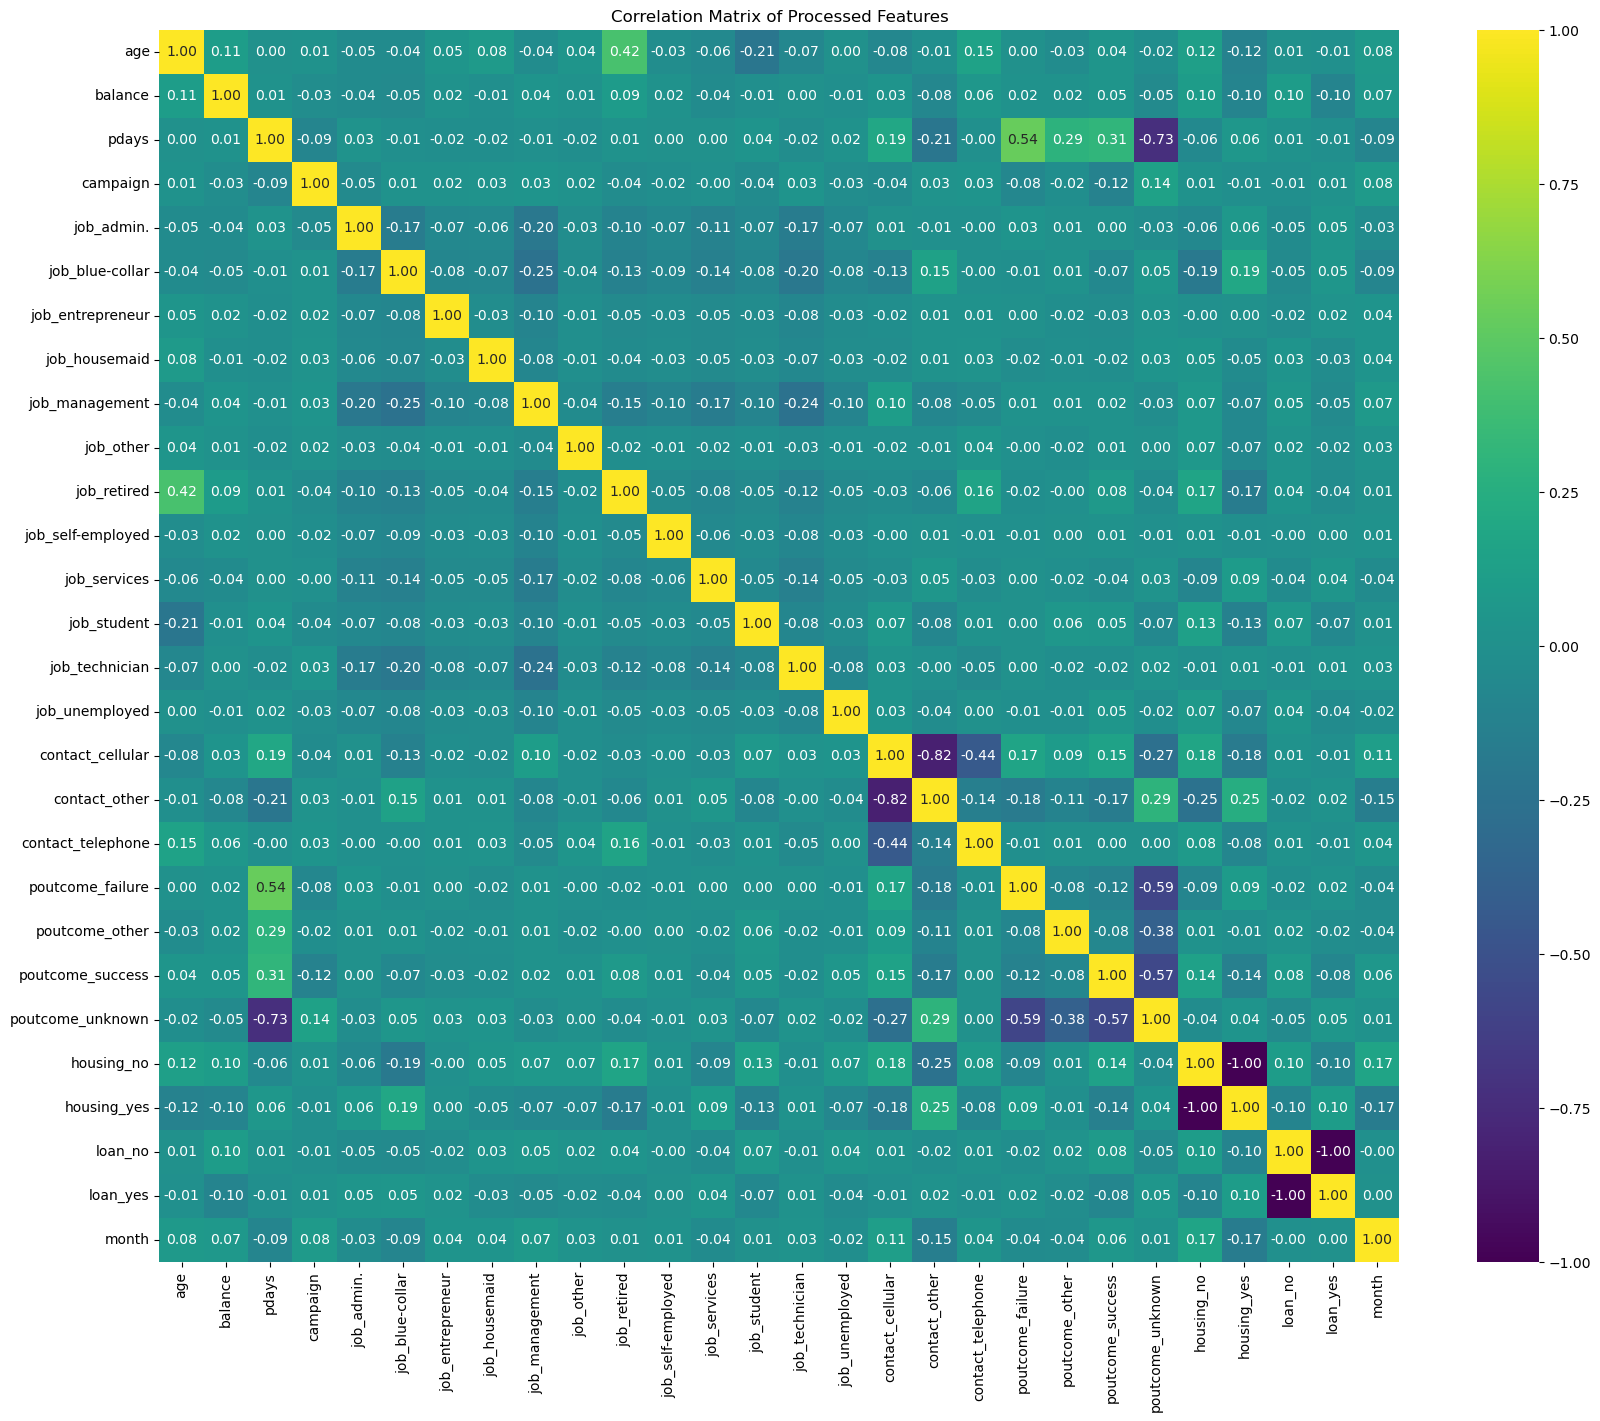

In [57]:
X_train_processed = preprocessor.fit_transform(X_train)

# Konversi hasil transformasi ke pandas DataFrame
# Dapatkan nama kolom setelah transformasi
numeric_features = ['age', 'balance', 'pdays', 'campaign']
categorical_features = ['job', 'contact', 'poutcome', 'housing', 'loan', 'month']

# Untuk kolom hasil OneHotEncoder, kita perlu mengekstrak nama kolomnya
onehot_columns = preprocessor.named_transformers_['Categorical 1'].named_steps['Encoder 1'].get_feature_names_out(categorical_features[:-1])

# Gabungkan semua nama kolom
all_columns = numeric_features + list(onehot_columns) + ['month']

# Buat DataFrame
X_train_df = pd.DataFrame(X_train_processed, columns=all_columns)

# Hitung matriks korelasi
corr_matrix = X_train_df.corr(method='spearman')

# Visualisasikan matriks korelasi
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Matrix of Processed Features")
plt.show()

In [58]:
dfcorr=X_train_df.select_dtypes(include='number')
corrMatrix=dfcorr.corr(method='spearman')
already_in = set()
result = []
for col in corrMatrix:
    large_corr = corrMatrix[col][corrMatrix[col] >= 0.75 ].index.tolist()
    if large_corr and col not in already_in:
        already_in.update(set(large_corr))
        large_corr.append(col)
        result.append(large_corr)

result

[['age', 'age'],
 ['balance', 'balance'],
 ['pdays', 'pdays'],
 ['campaign', 'campaign'],
 ['job_admin.', 'job_admin.'],
 ['job_blue-collar', 'job_blue-collar'],
 ['job_entrepreneur', 'job_entrepreneur'],
 ['job_housemaid', 'job_housemaid'],
 ['job_management', 'job_management'],
 ['job_other', 'job_other'],
 ['job_retired', 'job_retired'],
 ['job_self-employed', 'job_self-employed'],
 ['job_services', 'job_services'],
 ['job_student', 'job_student'],
 ['job_technician', 'job_technician'],
 ['job_unemployed', 'job_unemployed'],
 ['contact_cellular', 'contact_cellular'],
 ['contact_other', 'contact_other'],
 ['contact_telephone', 'contact_telephone'],
 ['poutcome_failure', 'poutcome_failure'],
 ['poutcome_other', 'poutcome_other'],
 ['poutcome_success', 'poutcome_success'],
 ['poutcome_unknown', 'poutcome_unknown'],
 ['housing_no', 'housing_no'],
 ['housing_yes', 'housing_yes'],
 ['loan_no', 'loan_no'],
 ['loan_yes', 'loan_yes'],
 ['month', 'month']]

Berdasarkan hasil analisis multikolinearitas yang ditunjukkan pada matrix korelasi, tidak ada fitur yang memiliki korelasi yang sangat tinggi (lebih dari 0.75), sehingga tidak ada fitur yang perlu dihapus. Semua fitur yang ada memiliki tingkat korelasi yang aman, dan tidak menunjukkan adanya multikolinearitas yang signifikan yang dapat mempengaruhi kestabilan model. Oleh karena itu, semua fitur dapat dipertahankan untuk analisis lebih lanjut.

## **Hyperparameter Tuning**

Pada tahap ini, kami menggunakan beberapa model machine learning yang umum digunakan, seperti **Logistic Regression**, **Random Forest**, **XGBoost**, **Decision Tree**, dan **K-Nearest Neighbors (KNN)**. Setiap model akan di-tuning hyperparameternya untuk meningkatkan performa prediksi. Tuning hyperparameter dilakukan menggunakan **GridSearchCV**, yang akan mencari kombinasi hyperparameter terbaik berdasarkan skor F1.

In [62]:
# Define pipeline
pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),  # Langkah preprocessing
    ("smote", SMOTE(random_state=35)),  # SMOTE untuk oversampling
    ("feature_selection", SelectKBest(score_func=f_classif, k=15)),  # Feature selection
    ('classifier', XGBClassifier(random_state=35))  # Placeholder classifier
])

# Update parameter grid with corrected DecisionTreeClassifier parameters
param_grid = [
    # Logistic Regression
    {
        'classifier': [LogisticRegression(random_state=35, max_iter=1000)],
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__class_weight': ['balanced', None]
    },
    # Random Forest
    {
        'classifier': [RandomForestClassifier(random_state=35)],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__class_weight': ['balanced']
    },
    # XGBoost
    {
        'classifier': [XGBClassifier(random_state=35, use_label_encoder=False, eval_metric='logloss')],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 6, 9],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__subsample': [0.8, 1.0],
        'classifier__colsample_bytree': [0.8, 1.0]
    },
    # Decision Tree
    {
        'classifier': [DecisionTreeClassifier(random_state=35)],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['sqrt', None]  # Mengganti 'auto' dengan 'sqrt' atau None
    },
    # K-Nearest Neighbors
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__algorithm': ['auto', 'ball_tree'],
        'classifier__p': [1, 2]
    }
]

# Define F1 scorer
f1_scorer = make_scorer(f1_score)

# Create GridSearchCV with F1 scorer
gscv = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring=f1_scorer, error_score="raise", verbose=1)

# Fit the model
gscv.fit(X_train, y_train)

# Print results
print("Best parameters:", gscv.best_params_)
print("Best F1 score:", gscv.best_score_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_dis

Best parameters: {'classifier': LogisticRegression(max_iter=1000, random_state=35), 'classifier__C': 0.01, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best F1 score: 0.665975976641593


In [63]:
best=gscv.best_estimator_
best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Binning 1',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    strategy='uniform'))]),
                                                  ['age']),
                                                 ('Numerical 2',
                                                  Pipeline(steps=[('Imputer 2',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Binning 2',
                                                                   KBinsDiscretizer(enc...
                                                   'housing', 'loan']),
                                                 ('Categorical 2',
                                                  Pipeline(steps=[('Encoder 2',
                                                                   OrdinalEncoder(categories=[['jan',
                                                                                               'feb',
                                                                                               'mar',
                                                                                               'apr',
                                                                                               'may',
                                                                                               'jun',
                                                                                               'jul',
                                                                                               'aug',
                                                                                               'sep',
                                                                                               'oct',
                                                                                               'nov',
                                                                                               'dec']]))]),
                                                  ['month'])])),
                ('smote', SMOTE(random_state=35)),
                ('feature_selection', SelectKBest(k=15)),
                ('classifier',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, random_state=35,
                                    solver='saga'))])

In [64]:
y_pred_train=gscv.best_estimator_.predict(X_train)
y_pred_test=gscv.best_estimator_.predict(X_test)

In [65]:
print('performance test \n',classification_report(y_test,y_pred_test))
print('f1_score',f1_score(y_test, y_pred_test))

performance test 
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       814
           1       0.63      0.67      0.65       746

    accuracy                           0.65      1560
   macro avg       0.66      0.66      0.65      1560
weighted avg       0.66      0.65      0.65      1560

f1_score 0.6506804925469863


In [66]:
pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__class_weight,param_classifier__penalty,param_classifier__solver,param_classifier__max_depth,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__n_estimators,param_classifier__colsample_bytree,param_classifier__learning_rate,param_classifier__subsample,param_classifier__max_features,param_classifier__algorithm,param_classifier__n_neighbors,param_classifier__p,param_classifier__weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,0.046346,0.004040,0.009320,0.005254,"LogisticRegression(max_iter=1000, random_state=35)",0.01,balanced,l2,saga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(max_iter=1000, random_state=35), 'classifier__C': 0.01, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}",0.658622,0.661501,0.677804,0.665976,0.008446,1
7,0.043183,0.003393,0.008404,0.002889,"LogisticRegression(max_iter=1000, random_state=35)",0.01,None,l2,saga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(max_iter=1000, random_state=35), 'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}",0.658622,0.661501,0.677804,0.665976,0.008446,1
2,0.054714,0.010547,0.008269,0.003781,"LogisticRegression(max_iter=1000, random_state=35)",0.01,balanced,l2,liblinear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(max_iter=1000, random_state=35), 'classifier__C': 0.01, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}",0.656313,0.659502,0.677450,0.664421,0.009304,3
6,0.046662,0.004194,0.007554,0.002080,"LogisticRegression(max_iter=1000, random_state=35)",0.01,None,l2,liblinear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(max_iter=1000, random_state=35), 'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}",0.656313,0.659502,0.677450,0.664421,0.009304,3
8,0.046938,0.008095,0.004502,0.000013,"LogisticRegression(max_iter=1000, random_state=35)",0.1,balanced,l1,liblinear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'classifier': LogisticRegression(max_iter=1000, random_state=35), 'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}",0.655419,0.657453,0.674769,0.662547,0.008682,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0.038964,0.008139,0.091078,0.010774,KNeighborsClassifier(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ball_tree,5,2,distance,"{'classifier': KNeighborsClassifier(), 'classifier__algorithm': 'ball_tree', 'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'distance'}",0.550952,0.609806,0.577088,0.579282,0.024077,284
273,0.035829,0.004520,0.092582,0.013103,KNeighborsClassifier(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ball_tree,3,1,distance,"{'classifier': KNeighborsClassifier(), 'classifier__algorithm': 'ball_tree', 'classifier__n_neighbors': 3, 'classifier__p': 1, 'classifier__weights': 'distance'}",0.553678,0.611367,0.570378,0.578475,0.024237,285
257,0.038231,0.009719,0.033498,0.003165,KNeighborsClassifier(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,auto,3,1,distance,"{'classifier': KNeighborsClassifier(), 'classifier__algorithm': 'auto', 'classifier__n_neighbors': 3, 'classifier__p': 1, 'classifier__weights': 'distance'}",0.553493,0.607673,0.571729,0.577632,0.022509,286
275,0.042556,0.008613,0.085036,0.008027,KNeighborsClassifier(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ball_tree,3,2,distance,"{'classifier': KNeighborsClassifier(), 'classifier__algorithm': 'ball

**Pasca dilakukan tuning terhadap semua model, model terbaik yang terpilih adalah LogisticRegression dengan f1-Score sebesar  0.650684 Saya akan memilih model Logistic Regression karena memiliki performa yang baik pada data test dengan F1 Score yang cukup tinggi dibanding yang lain dan juga standar deviasi yang lebih rendah dari yang lain.**


#### Logistic Regression: Cara Kerja Singkat

Logistic Regression adalah salah satu metode statistik yang digunakan untuk memprediksi probabilitas suatu kejadian dengan hasil biner, seperti ya/tidak, sukses/gagal, atau spam/bukan spam. Cara kerjanya dimulai dengan mengambil data input yang terdiri dari variabel independen (fitur) dan variabel dependen (target biner). Model ini menggunakan fungsi sigmoid, yang mengubah output persamaan linear (seperti \(b_0 + b_1X_1 + b_2X_2 + ...\)) ke dalam rentang 0 hingga 1. Nilai ini merepresentasikan probabilitas suatu kejadian. Jika probabilitas lebih besar dari 0.5, hasilnya diklasifikasikan sebagai 1 (positif), dan jika kurang dari atau sama dengan 0.5, hasilnya 0 (negatif). 

Proses pelatihan model dilakukan dengan menyesuaikan koefisien (\(b_0, b_1, b_2, ...\)) menggunakan metode Maximum Likelihood Estimation (MLE), yang bertujuan untuk memaksimalkan kemungkinan hasil observasi sesuai dengan data yang ada. Setelah model dilatih, ia dapat digunakan untuk memprediksi probabilitas kejadian baru. Logistic Regression sangat populer karena sederhana, mudah diinterpretasikan, dan efektif untuk masalah klasifikasi biner. 



## **ROC/AUC**

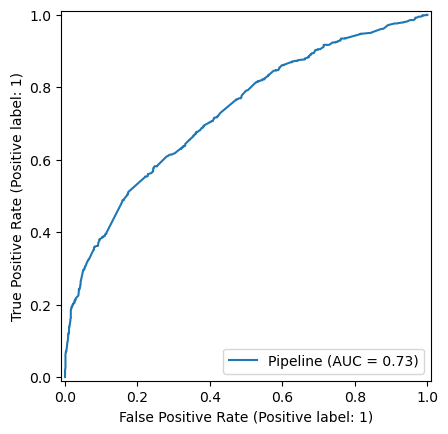

In [69]:
RocCurveDisplay.from_estimator(gscv.best_estimator_,X_test, y_test)

AUC mengindikasikan sejauh mana model dapat memisahkan atau membedakan antara kelas-kelas. Nilai ini menggambarkan kemampuan model dalam mengklasifikasikan kelas positif dan negatif.

Dengan AUC sebesar 0,73, artinya terdapat kemungkinan 73% bahwa model dapat membedakan dengan benar antara kelas positif dan negatif. Namun, nilai ini mungkin masih dianggap kurang optimal dalam konteks praktik profesional data science, di mana performa model sering kali dituntut lebih tinggi tergantung pada kompleksitas masalah dan domain aplikasinya.

## **Threshold Adjustment**

In [72]:
model=best
model.fit(X_train,y_train)

th_value=[i/100 for i in range(1,99)]
score=0
score_list=[]

for i in th_value:
    y_prob=model.predict_proba(X_test)[:,1]
    y_pred=np.where(y_prob>i,1,0)
    score_temp=f1_score(y_test,y_pred)
    score_list.append(score_temp)

th_f1 = pd.DataFrame({
    'th_value':th_value,
    "f1_score":score_list
})

th_f1=th_f1.sort_values("f1_score",ascending=False)

In [73]:
th_f1.head(1)["th_value"].values

array([0.39])

In [74]:
th_f1

,th_value,f1_score
38,0.39,0.684800
37,0.38,0.684043
40,0.41,0.683640
41,0.42,0.681295
39,0.40,0.680668
...,...,...
93,0.94,0.000000
94,0.95,0.000000
95,0.96,0.000000
96,0.97,0.000000


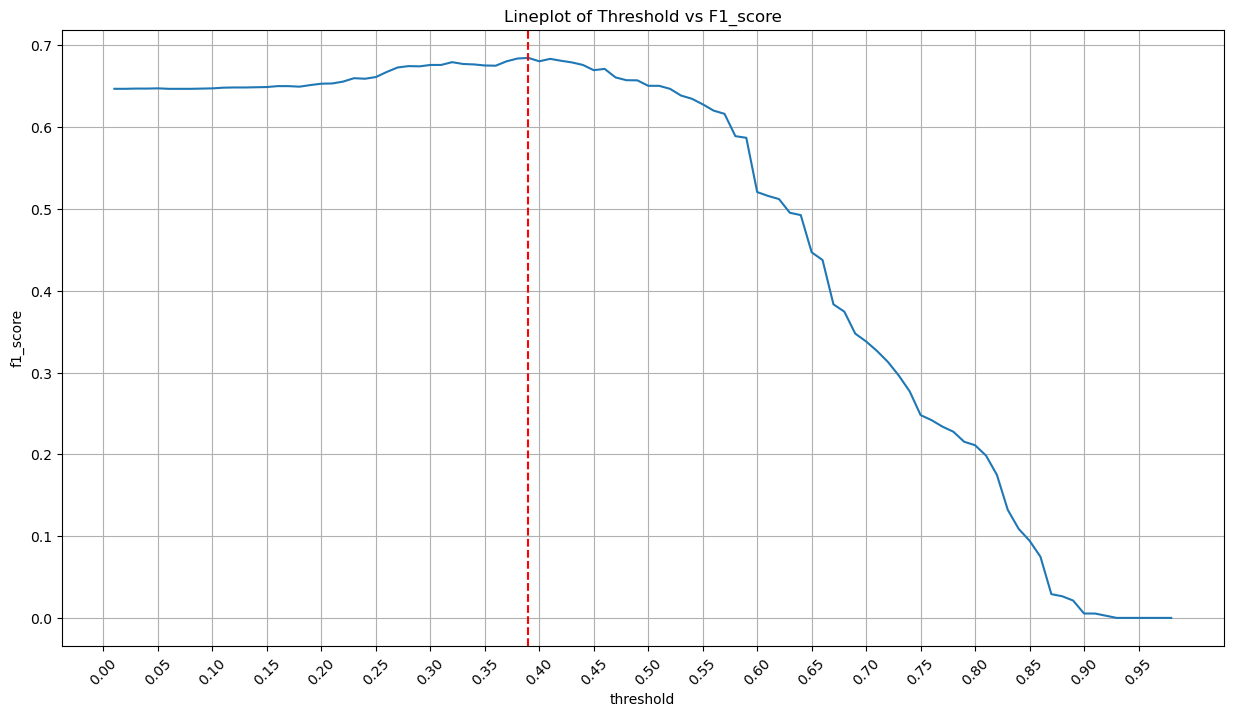

In [75]:
plt.figure(figsize=(15,8))
sns.lineplot(x=th_value,y=score_list)
plt.grid()
plt.xticks(np.arange(0,1,0.05),rotation=45)
plt.ylabel("f1_score")
plt.xlabel("threshold")
plt.title("Lineplot of Threshold vs F1_score")
plt.axvline(x=th_f1.head(1)["th_value"].values, linestyle='--',color='red')
plt.show()

In [76]:
y_prob=model.predict_proba(X_test)[:,1]
y_pred=np.where(y_prob>.39,1,0)
th_f1[th_f1['th_value']==.39]

,th_value,f1_score
38,0.39,0.6848


In [77]:
final_model_actual_pred_y = pd.DataFrame({
    "actual":y_test,
    "pred":y_pred
})
final_model_actual_pred_y 

,actual,pred
691,1,1
5150,0,0
2400,1,1
2488,1,1
7132,0,0
...,...,...
7259,0,0
7728,1,1
6924,1,0
527,0,0


In [78]:
confusion_matrix_final= final_model_actual_pred_y.groupby("actual")["pred"].value_counts().reset_index()
confusion_matrix_final

,actual,pred,count
0,0,1,487
1,0,0,327
2,1,1,642
3,1,0,104


In [79]:
print(classification_report(y_test,y_pred))
print('f1_score',f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.40      0.53       814
           1       0.57      0.86      0.68       746

    accuracy                           0.62      1560
   macro avg       0.66      0.63      0.61      1560
weighted avg       0.67      0.62      0.60      1560

f1_score 0.6848


Melalui penyesuaian threshold, model menunjukkan peningkatan performa prediktif dengan threshold optimal sebesar 39%. Ini berarti jika probabilitas prediksi melebihi 39%, instance akan diklasifikasikan sebagai positif (melakukan deposit). 

Setelah melakukan optimasi fitur, hyperparameter tuning, dan penyesuaian threshold, model mencapai skor F1 sebesar 0.68. Nilai ini mencerminkan keseimbangan yang cukup baik antara presisi dan recall, menunjukkan bahwa model mampu memprediksi sekitar 68% dari kelas positif (pelanggan yang melakukan deposit) secara akurat, sekaligus meminimalkan kesalahan false negatives.

Selain itu, model mencapai recall sebesar 0.86, yang mengindikasikan bahwa 86% dari seluruh kasus positif (pelanggan yang melakukan deposit) berhasil diidentifikasi dengan benar sebagai positif. Sementara itu, sisanya (14%) mengalami kesalahan klasifikasi sebagai negatif (false negatives). Performa ini menunjukkan kemampuan model dalam mendeteksi sebagian besar kasus positif, meskipun masih terdapat ruang untuk peningkatan dalam mengurangi false negatives.

## **Feature Evaluation**

In [82]:
# Get the best estimator from GridSearchCV
best_estimator = gscv.best_estimator_

# Get the transformer from the best estimator
transformer = best_estimator.named_steps['preprocessor']

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Transform X_train using the transformer
X_train_encoded = transformer.transform(X_train)

X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_train_encoded

,Numerical 1__age,Numerical 2__balance,Numerical 2__pdays,Numerical 3__campaign,Categorical 1__job_admin.,Categorical 1__job_blue-collar,Categorical 1__job_entrepreneur,Categorical 1__job_housemaid,Categorical 1__job_management,Categorical 1__job_other,Categorical 1__job_retired,Categorical 1__job_self-employed,Categorical 1__job_services,Categorical 1__job_student,Categorical 1__job_technician,Categorical 1__job_unemployed,Categorical 1__contact_cellular,Categorical 1__contact_other,Categorical 1__contact_telephone,Categorical 1__poutcome_failure,Categorical 1__poutcome_other,Categorical 1__poutcome_success,Categorical 1__poutcome_unknown,Categorical 1__housing_no,Categorical 1__housing_yes,Categorical 1__loan_no,Categorical 1__loan_yes,Categorical 2__month
0,0.0,0.0,0.0,-0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,5.0
1,2.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0
2,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0
3,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,7.0
4,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6233,1.0,0.0,1.0,-0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0
6234,1.0,0.0,0.0,-0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0
6235,1.0,0.0,2.0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
6236,1.0,0.0,0.0,-0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0


In [83]:
final_estimator = best_estimator.named_steps['classifier']

In [84]:
selected_features = best_estimator.named_steps['feature_selection'].get_support(indices=True)
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

In [85]:
test = feature_names[selected_features]

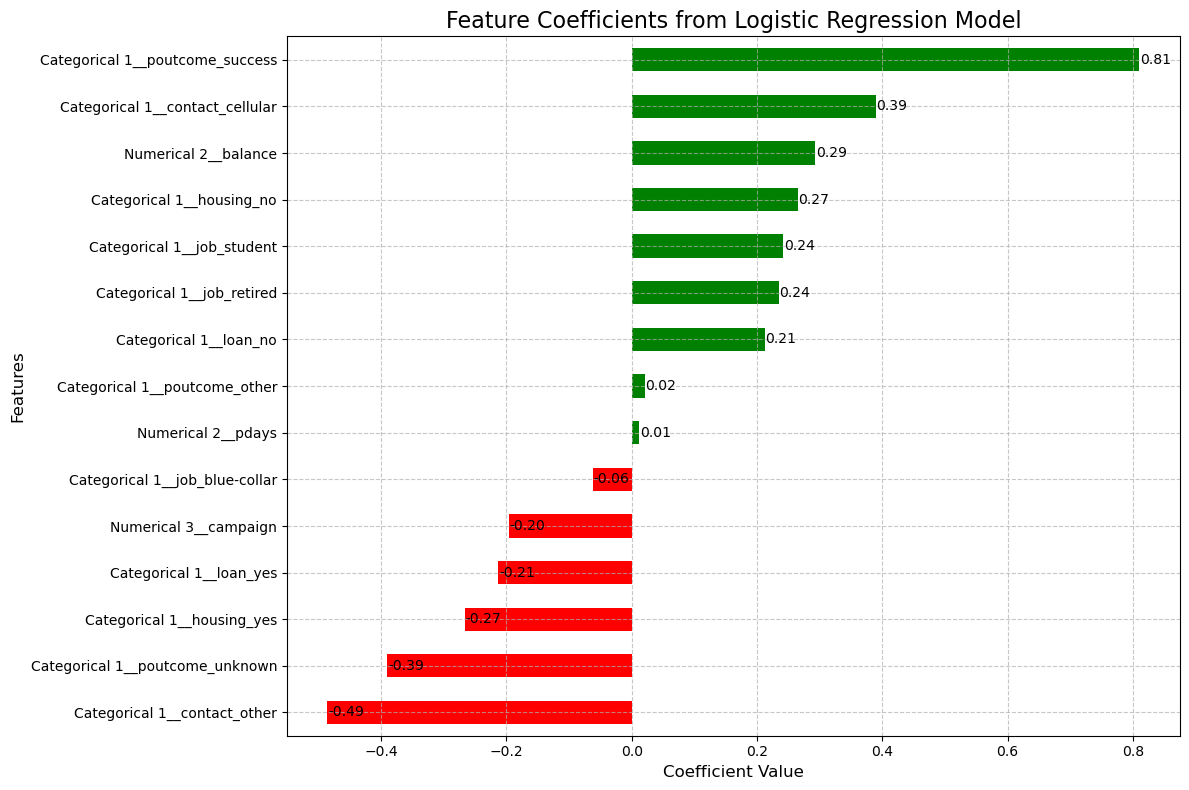

In [86]:
model_coef = pd.Series(final_estimator.coef_[0], index=test).sort_values()
model_coef

# Plot the coefficients (which represent feature importance for logistic regression)
plt.figure(figsize=(10, 6))

# Bar plot dengan pewarnaan berbeda untuk koefisien positif dan negatif
colors = ['red' if val < 0 else 'green' for val in model_coef]

ax = model_coef.plot(kind='barh', color=colors, title='Feature Coefficients (Logistic Regression)', figsize=(12, 8))

# Menambahkan grid untuk memudahkan pembacaan
ax.grid(True, linestyle='--', alpha=0.7)

# Mengatur label agar lebih mudah dibaca
ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_ylabel('Features', fontsize=12)

# Memutar label fitur di sumbu Y untuk keterbacaan yang lebih baik
plt.yticks(rotation=0)

# Menambahkan anotasi ke setiap bar dengan nilai koefisien
for i in ax.patches:
    ax.text(i.get_width() + 0.001,  # posisi x (di akhir bar)
            i.get_y() + i.get_height() / 2,  # posisi y (tengah bar)
            f'{i.get_width():.2f}',  # teks yang ditampilkan (nilai koefisien)
            ha='left',  # perataan horizontal (perata kiri)
            va='center',  # perataan vertikal (perata tengah)
            fontsize=10)  # ukuran font

# Menampilkan plot
plt.title('Feature Coefficients from Logistic Regression Model', fontsize=16)
plt.tight_layout()  # Menyesuaikan layout agar tidak ada elemen yang terpotong
plt.show()

### Interpretasi Koefisien Model Regresi Logistik

- **poutcome_success (0.81)**: Variabel ini memiliki pengaruh positif terkuat terhadap prediksi, menunjukkan bahwa pelanggan dengan hasil kampanye sebelumnya yang sukses lebih cenderung mengambil program deposito berjangka.

- **contact_cellular (0.39)**: Pelanggan yang dihubungi melalui telepon seluler memiliki kemungkinan lebih tinggi untuk merespons kampanye.

- **housing_no (0.27)**: Pelanggan tanpa tanggungan perumahan lebih mungkin untuk mengambil program deposito.

- **job_student (0.24) dan job_retired (0.24)**: Pelanggan yang berstatus mahasiswa atau pensiunan menunjukkan kecenderungan positif terhadap program deposito.

- **loan_no (0.21)**: Pelanggan tanpa pinjaman lebih cenderung merespons kampanye.

- **poutcome_other (0.02) dan poutcome_unknown (-0.39)**: Hasil kampanye sebelumnya yang tidak spesifik atau tidak diketahui juga berpengaruh, meskipun dengan tingkat yang berbeda.

- **campaign (-0.20)**: Jumlah kontak kampanye yang lebih tinggi cenderung mengurangi kemungkinan respons positif, menunjukkan potensi kelelahan pelanggan.

- **contact_other (-0.49)**: Metode kontak selain telepon seluler memiliki pengaruh negatif yang signifikan terhadap respons pelanggan.

## **Limitasi Model**

In [98]:
best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical 1',
                                                  Pipeline(steps=[('Imputer 1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Binning 1',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    strategy='uniform'))]),
                                                  ['age']),
                                                 ('Numerical 2',
                                                  Pipeline(steps=[('Imputer 2',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Binning 2',
                                                                   KBinsDiscretizer(enc...
                                                   'housing', 'loan']),
                                                 ('Categorical 2',
                                                  Pipeline(steps=[('Encoder 2',
                                                                   OrdinalEncoder(categories=[['jan',
                                                                                               'feb',
                                                                                               'mar',
                                                                                               'apr',
                                                                                               'may',
                                                                                               'jun',
                                                                                               'jul',
                                                                                               'aug',
                                                                                               'sep',
                                                                                               'oct',
                                                                                               'nov',
                                                                                               'dec']]))]),
                                                  ['month'])])),
                ('smote', SMOTE(random_state=35)),
                ('feature_selection', SelectKBest(k=15)),
                ('classifier',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, random_state=35,
                                    solver='saga'))])

In [99]:
data_streamlit_x= pd.concat([X_train, X_test])
data_streamlit_x

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
7444,29,blue-collar,296,yes,no,NaN,jun,1,-1,unknown
678,53,technician,195,yes,no,cellular,may,1,90,success
4894,21,student,53,no,no,cellular,jun,1,-1,unknown
6822,54,retired,11,yes,yes,cellular,aug,10,-1,unknown
7593,48,admin.,292,yes,yes,cellular,jul,6,-1,unknown
...,...,...,...,...,...,...,...,...,...,...
7259,52,services,-336,no,yes,NaN,jun,8,-1,unknown
7728,42,services,774,no,no,cellular,jan,1,-1,unknown
6924,40,services,1082,yes,no,NaN,may,2,-1,unknown
527,52,management,944,no,yes,NaN,jun,1,-1,unknown


In [100]:
data_streamlit_y= pd.concat([y_train, y_test])
data_streamlit_y

7444    0
678     1
4894    1
6822    0
7593    0
       ..
7259    0
7728    1
6924    1
527     0
4107    1
Name: deposit, Length: 7798, dtype: int64

In [101]:
best_estimator_streamlit= best
streamlit_1= best_estimator_streamlit.fit(data_streamlit_x, data_streamlit_y)


In [102]:
import pickle

In [103]:
#Saving models

filename = 'Bank_marketing.sav'

## Uncomment code dibawah untuk saving file model

pickle.dump(streamlit_1,open(filename,'wb'))

NameError: name 'filename' is not defined

In [ ]:
display(X_train.describe())

pd.set_option('display.max_colwidth', None)


columns = X_train.select_dtypes(exclude='number').columns
values = []
nunique_list = []
for i in columns:
    value = X_train[i].unique()
    nunique = X_train[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values,
    "nunique": nunique_list
})
       )
pd.reset_option('display.max_colwidth')

## Kriteria Data untuk Model

Model hanya dapat bekerja dengan baik jika data yang diuji memenuhi kriteria berikut:

| Kriteria  | Rentang Nilai                        | Nilai yang Diperbolehkan                                                                                                    |
|-----------|--------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| **Usia**  | 18 - 95                              | -                                                                                                                           |
| **Balance** | (-6847) - 37127                    | -                                                                                                                           |
| **Campaign** | 1 - 33                             | -                                                                                                                           |
| **Pdays**  | (-1) - 828                           | -                                                                                                                           |
| **Job**    | -                                    | blue-collar, technician, student, retired, admin, housemaid, services, unemployed, management, entrepreneur, self-employed |
| **Housing** | -                                   | yes, no                                                                                                                     |
| **Loan**   | -                                    | yes, no                                                                                                                     |
| **Contact** | -                                   | cellular, telephone                                                                                                         |
| **Month**  | -                                    | jun, may, aug, jul, nov, apr, feb, jan, oct, sep, mar, dec                                                                  |
| **Poutcome** | -                                  | unknown, success, other, failure                                                                                             |

Dengan data ini, kita dapat memastikan bahwa nilai yang ada dalam dataset sudah memenuhi kriteria yang ditetapkan untuk proses pemodelan lebih lanjut.


## **Kesimpulan**

#### **Model yang dipilih**


In [90]:
# model yang dipilih menjawab business problem
model_logreg_hyper = gscv.best_estimator_
model_logreg_hyper.fit(X_train,y_train)
print(classification_report(y_test, model_logreg_hyper.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       814
           1       0.63      0.67      0.65       746

    accuracy                           0.65      1560
   macro avg       0.66      0.66      0.65      1560
weighted avg       0.66      0.65      0.65      1560



In [91]:
print(classification_report(y_test,y_pred))
print('f1_score',f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.40      0.53       814
           1       0.57      0.86      0.68       746

    accuracy                           0.62      1560
   macro avg       0.66      0.63      0.61      1560
weighted avg       0.67      0.62      0.60      1560

f1_score 0.6848


#### **Confussion Metrics**

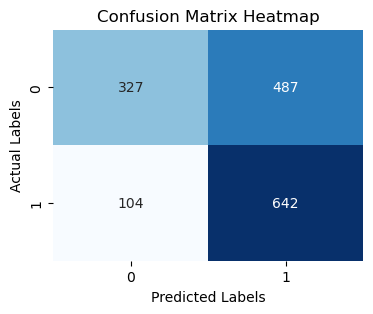

In [111]:
# Pivot table untuk menghasilkan format confusion matrix
conf_matrix = confusion_matrix_final.pivot(index='actual', columns='pred', values='count').fillna(0)

# Visualisasi heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)

# Menambahkan judul dan label
plt.title("Confusion Matrix Heatmap")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

# Tampilkan plot
plt.show()

In [117]:
confusion_matrix_final.sort_values(by=["actual","pred"],ascending=[False,False])

,actual,pred,count
2,1,1,642
3,1,0,104
0,0,1,487
1,0,0,327


#### **Cost Evaluation**
##### **tanpa model**
Dari 1.560 customer, apabila perusahaan tidak menggunakan model prediktif, maka perusahaan perlu membayar biaya telemarketing sebesar 1.560 orang dikalikan durasi telepon sekitar 10 menit (dengan biaya per menit rata-rata di Indonesia sebesar Rp. 100/menit). Dengan demikian, total biaya telepon yang dikeluarkan adalah Rp. 1.560.000. Selain itu, tim telemarketing perlu menghabiskan waktu sebanyak 15.600 menit atau setara dengan 260 jam untuk menghubungi seluruh customer tersebut.

Diasumsikan rata-rata keuntungan yang bisa didapat dari satu orang yang melakukan deposito adalah sekitar Rp. 10.000, maka perusahaan bank dapat memperoleh keuntungan dari 746 orang yang melakukan deposit sebesar Rp. 7.460.000. Dengan mengurangi total biaya telepon dari total keuntungan, perusahaan akan mendapatkan keuntungan bersih sebesar Rp. 5.900.000.

Dengan demikian, untuk 1.560 customer, perusahaan akan mengeluarkan biaya telepon sebesar Rp. 1.560.000 dan mendapatkan keuntungan bersih sebesar Rp. 5.900.000.<br>

Perhitungan : 
* ongkos biaya menelepon = 1560x100x10 = Rp. 1.560.000
* waktu yang dihabiskan = 1560 x 10 = 15.600 menit atau 260 jam
* pendapatan dari customer yang berdeposit = 933 x Rp. 10.000 = Rp. 9.330.000
* total pendapatan = Rp. 7.460.000 -  Rp. 1.560.000 = Rp. Rp. 5.900.000
* memakan waktu sebanyak 260 jam

##### **dengan model**
Dengan menggunakan model prediksi, perusahaan hanya perlu menelepon 1.129 customer yang diprediksi akan melakukan deposit, dengan biaya telepon sekitar 10 menit per customer. Oleh karena itu, perusahaan perlu menyediakan anggaran untuk menelepon sebesar Rp. 1.129.000 dan telemarketing perlu menghabiskan waktu sekitar 11.290 menit atau 188 jam. Dari 1.129 customer yang ditelepon, 642 customer melakukan deposit. Jika perusahaan mendapatkan keuntungan sekitar Rp. 10.000 dari tiap customer yang melakukan deposit, maka pendapatan kotor yang diperoleh perusahaan adalah sebesar Rp. 6.420.000. Jika dikurangi dengan biaya menelepon, perusahaan memperoleh keuntungan sebesar Rp. 5.291.000. Namun, waktu yang dibutuhkan oleh bagian telemarketing hanya 188 jam, yang hampir 3 kali lebih cepat dibandingkan tanpa penerapan model. Waktu yang dihemat ini dapat digunakan untuk menelepon customer lain yang berpotensi melakukan deposit, sehingga perusahaan dapat bekerja 3 kali lebih cepat dengan adanya model. Oleh karena itu, perusahaan diperkirakan dapat meraup keuntungan sebesar Rp. 15.873.000.<br>

Perhitungan:

* Ongkos biaya telepon = 1.129 x 100 x 10 = Rp. 1.129.000
* Waktu yang dihabiskan = 1.129 x 10 = 11.290 menit atau 188 jam
* Pendapatan dari customer yang berdeposit = 642 x 10.000 = Rp. 6.420.000
* Total pendapatan = Rp. 6.420.000 - Rp. 1.129.000 = Rp. 5.291.000
* Dengan waktu yang sama tanpa model, dapat menghasilkan = 3 x 5.291.000 = Rp. 15.873.000.

#### **Kesimpulan**
Apabila kita kembali ke business problem yang diajukan, yaitu mencari model yang dapat mengurangi biaya pemasaran dan meningkatkan profitabilitas perusahaan, perbandingan antara penggunaan model dan tanpa model memberikan gambaran yang jelas. Tanpa menggunakan model, perusahaan dapat memperoleh keuntungan sekitar Rp. 5.900.000 dengan menghabiskan waktu 260 jam. Sebaliknya, dengan menggunakan model prediksi, perusahaan dapat meraup keuntungan sebesar Rp. 5.291.000 hanya dalam waktu 188 jam. Meskipun keuntungan yang dihasilkan tanpa model lebih tinggi, perusahaan harus menghabiskan waktu hampir 3 kali lebih lama.

Waktu yang dihemat dengan penggunaan model dapat dialokasikan untuk menelepon customer lain yang berpotensi melakukan deposit atau mengambil kampanye pemasaran lainnya. Oleh karena itu, apabila perusahaan dapat bekerja lebih cepat dengan model ini, pendapatan yang diperoleh dengan waktu yang sama dapat mencapai sekitar Rp. 15.873.000, yang hampir 3 kali lipat dari keuntungan yang dihasilkan tanpa model.

**Kesimpulan**: Seperti yang telah dijelaskan, penerapan model prediksi terbukti dapat menjawab masalah bisnis perusahaan, karena meskipun menghasilkan keuntungan sedikit lebih rendah per periode waktu, model ini menghemat waktu dan memungkinkan perusahaan untuk bekerja lebih efisien, yang pada akhirnya dapat meningkatkan profitabilitas secara keseluruhan.

## **Rekomendasi**

- **Menambahkan Fitur yang Relevan**: Memasukkan variabel-variabel baru yang mungkin memiliki pengaruh signifikan terhadap target, seperti pendapatan bulanan, jumlah tanggungan keluarga, durasi pengalaman kerja, dan sebagainya. Hal ini dapat meningkatkan akurasi model dengan memperhitungkan faktor-faktor tambahan yang berpotensi memengaruhi hasil prediksi.

- **Memperluas Validasi Cross dengan Model Lain**: Selain menggunakan lima model yang sudah ada, disarankan untuk mengeksplorasi model-model lain dalam proses validasi cross. Ini bertujuan untuk membandingkan performa berbagai model dan memilih yang paling optimal.

- **Meningkatkan Kompleksitas Model**: Mengembangkan model yang lebih kompleks dengan menambahkan lapisan atau parameter tambahan, seperti menggunakan teknik ensemble learning atau algoritma yang lebih canggih. Ini dapat membantu menangkap pola yang lebih rumit dalam data.

- **Melakukan A/B Testing**: Menguji performa model yang telah dibuat dengan melakukan A/B testing. Ini bertujuan untuk membandingkan efektivitas model dalam skenario nyata dan memastikan bahwa model tersebut memberikan hasil yang konsisten dan dapat diandalkan.

Dengan menerapkan rekomendasi ini, diharapkan model dapat menjadi lebih akurat, robust, dan siap digunakan dalam situasi nyata.